# 数组中的搜索 Search
我们考虑我们有数据结构 `A[n]` 储存了 $n$ 个元素, 现在考虑如何快速查找某元素 `e` 是否存在于 `A` 中. 也即 从 `A` 中快速搜索元素 `e`. 我们假设 `A` 中储存元素的 key 均为整数.

In [29]:
A = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]

### 1. 遍历搜索
最直观的, 对于一个无序的数据结构 `A`, 我们考虑遍历 `A` 中所有元素, 直到遍历完 `A` (也即不存在该元素)或在遍历过程中找到.

In [30]:
def traversal_search(A, e):
    print("We are searching for:", e, "from the list:", A)
    for x in A:
        print("We are checking:", x, end = ', ')
        if x == e:
            print(x, "is equal to the target", e, "\nWe get it!\n")
            return True
        else:
            print(x, "is not equal to the target", e, "we try the next one.")
    print("We have checked all elements, but did not find", e)
    print()
    return False

# test
traversal_search(A, 2) # first element, Best-case
traversal_search(A, 19)# A random element, Average-case
traversal_search(A, 47)# last element, Worst-case
traversal_search(A, 4)# not in the list, Worst-case

We are searching for: 2 from the list: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
We are checking: 2, 2 is equal to the target 2 
We get it!

We are searching for: 19 from the list: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
We are checking: 2, 2 is not equal to the target 19 we try the next one.
We are checking: 3, 3 is not equal to the target 19 we try the next one.
We are checking: 5, 5 is not equal to the target 19 we try the next one.
We are checking: 7, 7 is not equal to the target 19 we try the next one.
We are checking: 11, 11 is not equal to the target 19 we try the next one.
We are checking: 13, 13 is not equal to the target 19 we try the next one.
We are checking: 17, 17 is not equal to the target 19 we try the next one.
We are checking: 19, 19 is equal to the target 19 
We get it!

We are searching for: 47 from the list: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
We are checking: 2, 2 is not equal to the target 47 we try the next on

False

我们不难分析其时间复杂度:
1. 最好情况, 我们搜索的是第一个元素, $O(1)$
2. 最坏情况, 该元素不在/在末尾, $O(n)$
3. 平均情况, 同样是 $O(n)$

事实上, 对于一个有n个元素的数组, 我们无法通过少于n次的 **比较操作** 确定性的搜索某元素!
证明十分简单, 如果我们有一种算法, 能通过少于n次的比较操作搜索任意元素, 那么每次搜索都至少有一个元素没有被比较过, 我们就不知道这个元素于搜索元素的关系.

也即, 对于一个无需的数组(或者说是无结构的数据库), 我们需要 $O(N)$ 的时间复杂度搜索一个元素!

我们接下来考虑若数据有序的情况
### 2. 二分搜索
这也是最经典的搜索算法. 具体步骤为, 先检测 **该组数据的大小中位数**, 通过比较大小, 判断我们搜索的元素在该中位数的前或后.

In [31]:
def binary_search(A, e):
    print("We are searching for:", e, "from the sorted list:", A)
    if len(A) == 0:
        print("The list is empty, we did not find", e, "\n")
        return False
    mid = len(A) // 2
    print("We are checking the middle element:", A[mid])
    if A[mid] == e:
        print(A[mid], "is equal to the target", e, "\nWe get it!\n-----------------------------------\n")
        return True
    elif A[mid] < e:
        print(A[mid], "is less than the target", e, "\nWe continue to search in the right half.\n")
        return binary_search(A[mid+1:], e)
    else:
        print(A[mid], "is greater than the target", e, "\nWe continue to search in the left half.\n")
        return binary_search(A[:mid], e)

# test
binary_search(A, 17)# Middle element, Best-case
binary_search(A, 4)# not in the list, Worst-case

We are searching for: 17 from the sorted list: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
We are checking the middle element: 19
19 is greater than the target 17 
We continue to search in the left half.

We are searching for: 17 from the sorted list: [2, 3, 5, 7, 11, 13, 17]
We are checking the middle element: 7
7 is less than the target 17 
We continue to search in the right half.

We are searching for: 17 from the sorted list: [11, 13, 17]
We are checking the middle element: 13
13 is less than the target 17 
We continue to search in the right half.

We are searching for: 17 from the sorted list: [17]
We are checking the middle element: 17
17 is equal to the target 17 
We get it!
-----------------------------------

We are searching for: 4 from the sorted list: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
We are checking the middle element: 19
19 is greater than the target 4 
We continue to search in the left half.

We are searching for: 4 from the sorted lis

False

我们分析其时间复杂度:
1. 最好情况, 搜索的是其中位数, $O(1)$
2. 最坏情况, 搜索的是这颗平衡二叉树的叶子结点, 需要 $O(\log n)$
3. 平均情况, 这颗平衡二叉树的平均深度, 也是 $O(\log n)$ 级别

### 跳跃搜索 Jump Search
同样是对于有序数组 `A`, 我们考虑对这个数据结构 **随机访问** 的成本很高(利用cache, 顺序访问效率理论上更高), 我们考虑每次通过特定的步长进行跳跃查询.

也即, 我们以 $k<n$ 作为步长(jump size), 将 `A` 均匀的分成 $\lfloor\frac{n}{k}\rfloor$ 组, 每次比较每组的第一个元素, 以此确定元素在哪组, 并在组内寻找.

In [32]:
def jump_search(A, e, step):
    print("We are searching for:", e, "from the sorted list:", A, "with jump size:", step)
    n = len(A)
    prev = 0
    while prev < n and A[min(n-1, prev + step - 1)] < e:
        print("We are checking element:", A[min(n-1, prev + step - 1)])
        prev += step
    print("We found the block where", e, "may be located, we search linearly in this block.\n")
    for i in range(prev, min(prev + step, n)):
        print("We are checking:", A[i], end = ', ')
        if A[i] == e:
            print(A[i], "is equal to the target", e, "\nWe get it!\n-----------------------------------\n")
            return True
        else:
            print(A[i], "is not equal to the target", e, "we try the next one.")
    print("We have checked all elements in the block, but did not find", e, "\n")
    return False

#test
jump_search(A, 23, 4) 

We are searching for: 23 from the sorted list: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47] with jump size: 4
We are checking element: 7
We are checking element: 19
We found the block where 23 may be located, we search linearly in this block.

We are checking: 23, 23 is equal to the target 23 
We get it!
-----------------------------------



True

这个的时间复杂度比较复杂:
1. 最好情况, $O(1)$
2. 最坏情况, 该元素在A末尾, $O(\lfloor\frac{n}{k}\rfloor + k)$, 在实际场景中, 我们通常取 $k=\sqrt{n}$, 故时间复杂度就是 $O(\sqrt{n})$
3. 平均情况, $T(n) = T(k) + O(\frac{n}{k})$, 当我们取步长为 $\lfloor\sqrt{n}\rfloor$ 时, 平均时间复杂度为: $O(\sqrt{n})$

当我们取步长为 $\lfloor\sqrt{n}\rfloor$ 时, 也被称作 **Square-root search**

再注意到, 当我们取步长为 $\lfloor\frac{n}{2}\rfloor$ 时, 这也就是前文中提到的 **二分搜索** !

### 4. 插值搜索 Interpolation search
我们考虑通过搜索元素 `e` 在这组数据范围的相对位置, 来预测其相对应的位置.


In [33]:
def interpolation_search(A, e):
    print("We are searching for:", e, "from the sorted list:", A)
    low = 0
    high = len(A) - 1

    while low <= high and e >= A[low] and e <= A[high]:
        if low == high:
            if A[low] == e:
                print(A[low], "is equal to the target", e, "\nWe get it!\n-----------------------------------\n")
                return True
            print("We did not find", e, "\n")
            return False
        
        pos = low + ((e - A[low]) * (high - low) // (A[high] - A[low]))
        print("We are checking element:", A[pos], "at position:", pos)
        
        if A[pos] == e:
            print(A[pos], "is equal to the target", e, "\nWe get it!\n-----------------------------------\n")
            return True
        if A[pos] < e:
            print(A[pos], "is less than the target", e, "\nWe continue to search in the upper part.\n")
            low = pos + 1
        else:
            print(A[pos], "is greater than the target", e, "\nWe continue to search in the lower part.\n")
            high = pos - 1

    print("We did not find", e, "\n")
    return False

# test
interpolation_search(A, 31)

We are searching for: 31 from the sorted list: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
We are checking element: 29 at position: 9
29 is less than the target 31 
We continue to search in the upper part.

We are checking element: 31 at position: 10
31 is equal to the target 31 
We get it!
-----------------------------------



True

我们估算其时间复杂度:
1. 最好情况: $O(1)$
2. 最坏情况: 数据完全偏向另一侧, $O(n)$
3. 平均情况: 考虑数据大体是均匀的分布在数据范围内, 时间复杂度约为 $O(\log\log n)$
proof(来自通义千问生成):
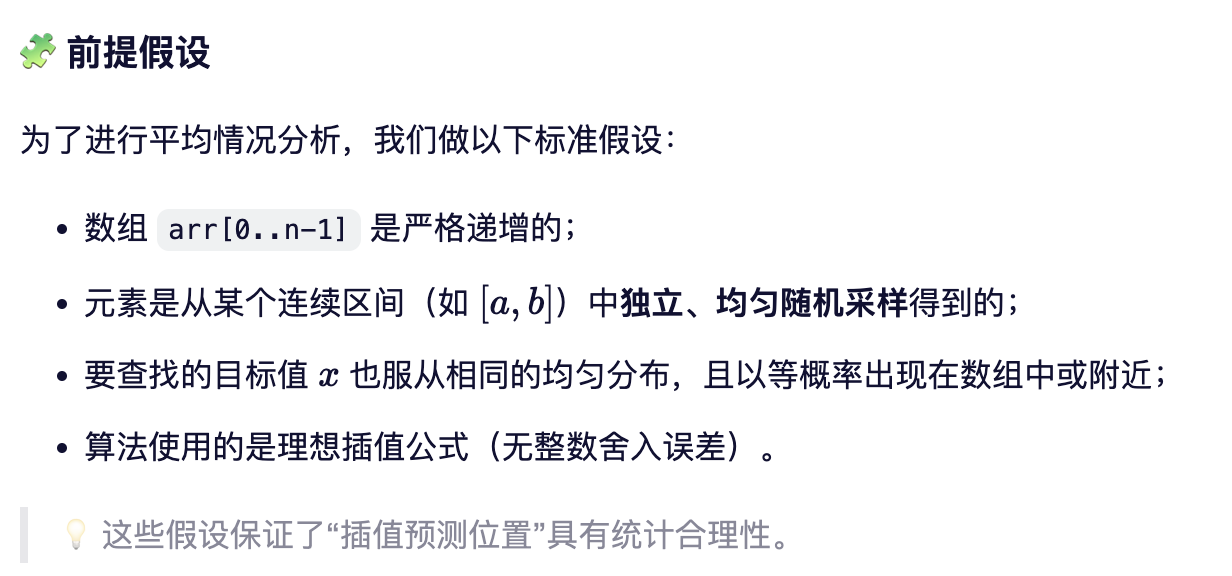
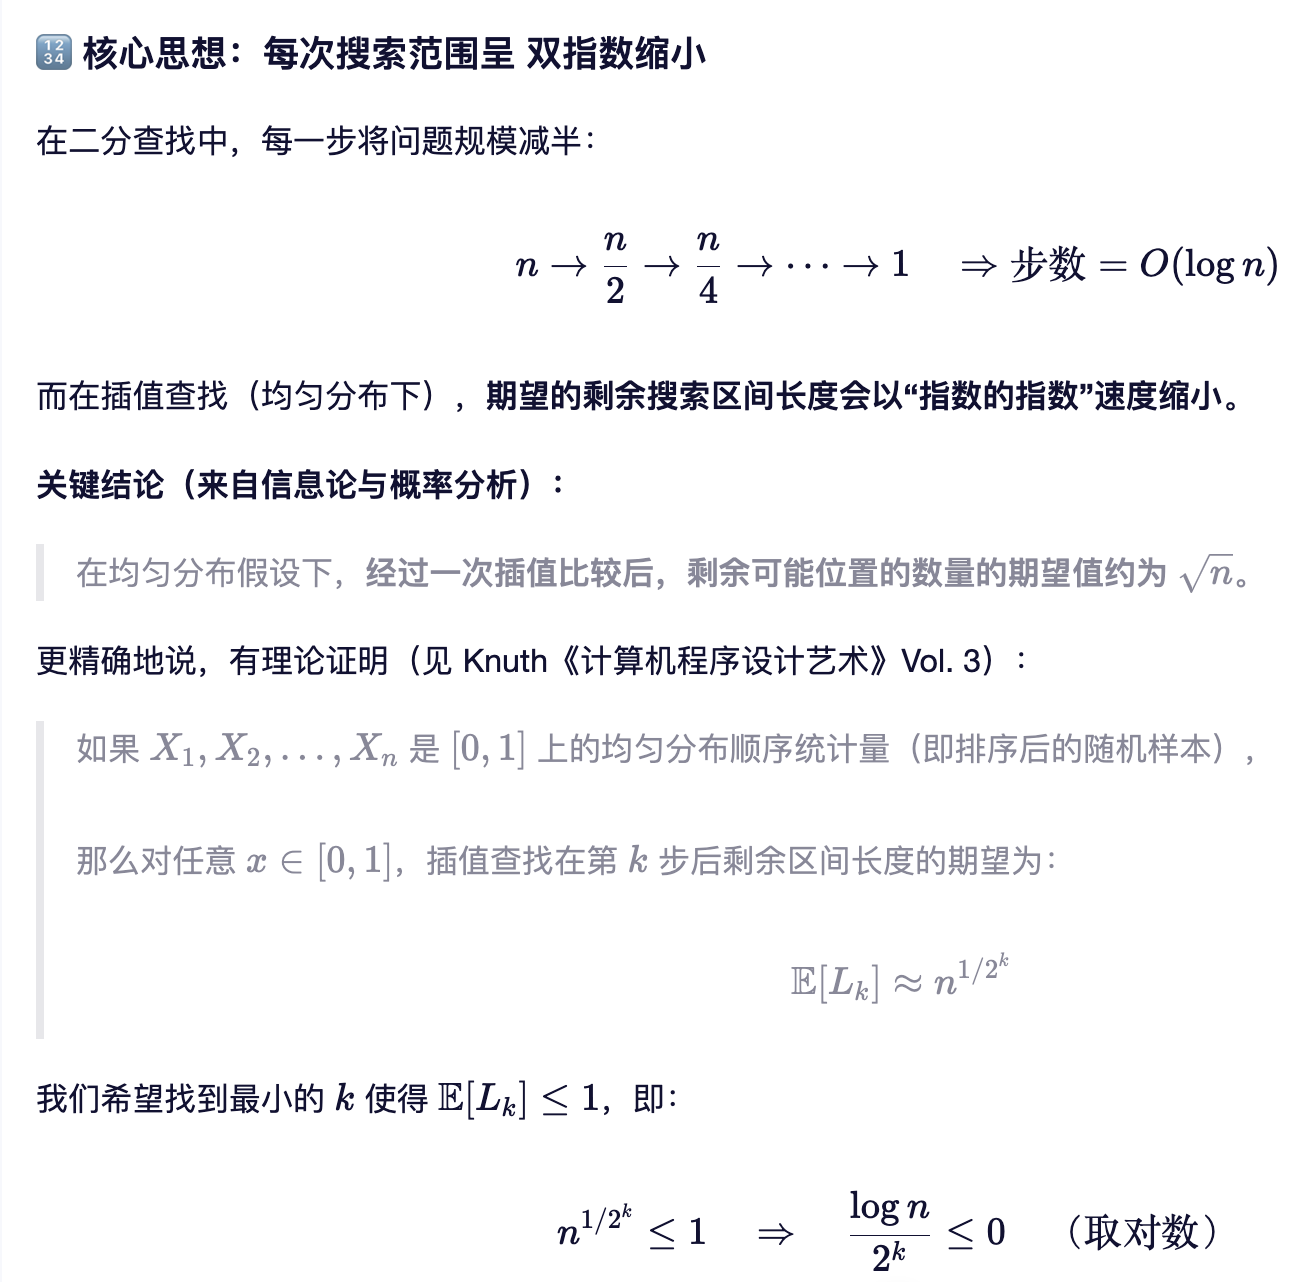
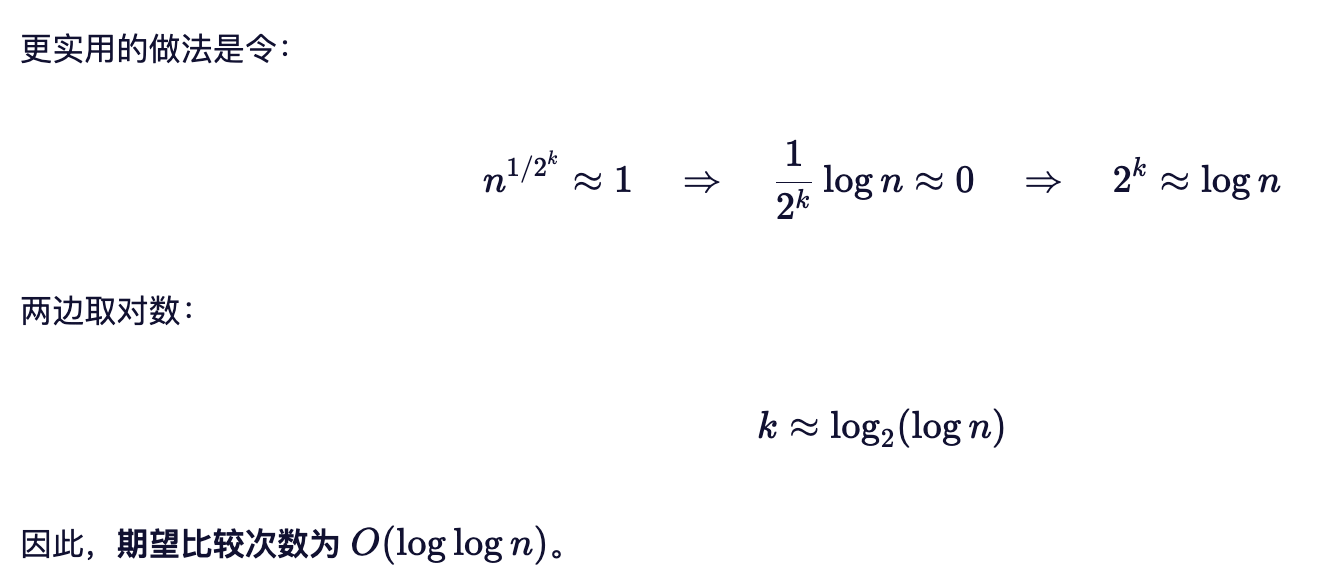